In [814]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [815]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [816]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [817]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [818]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [819]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

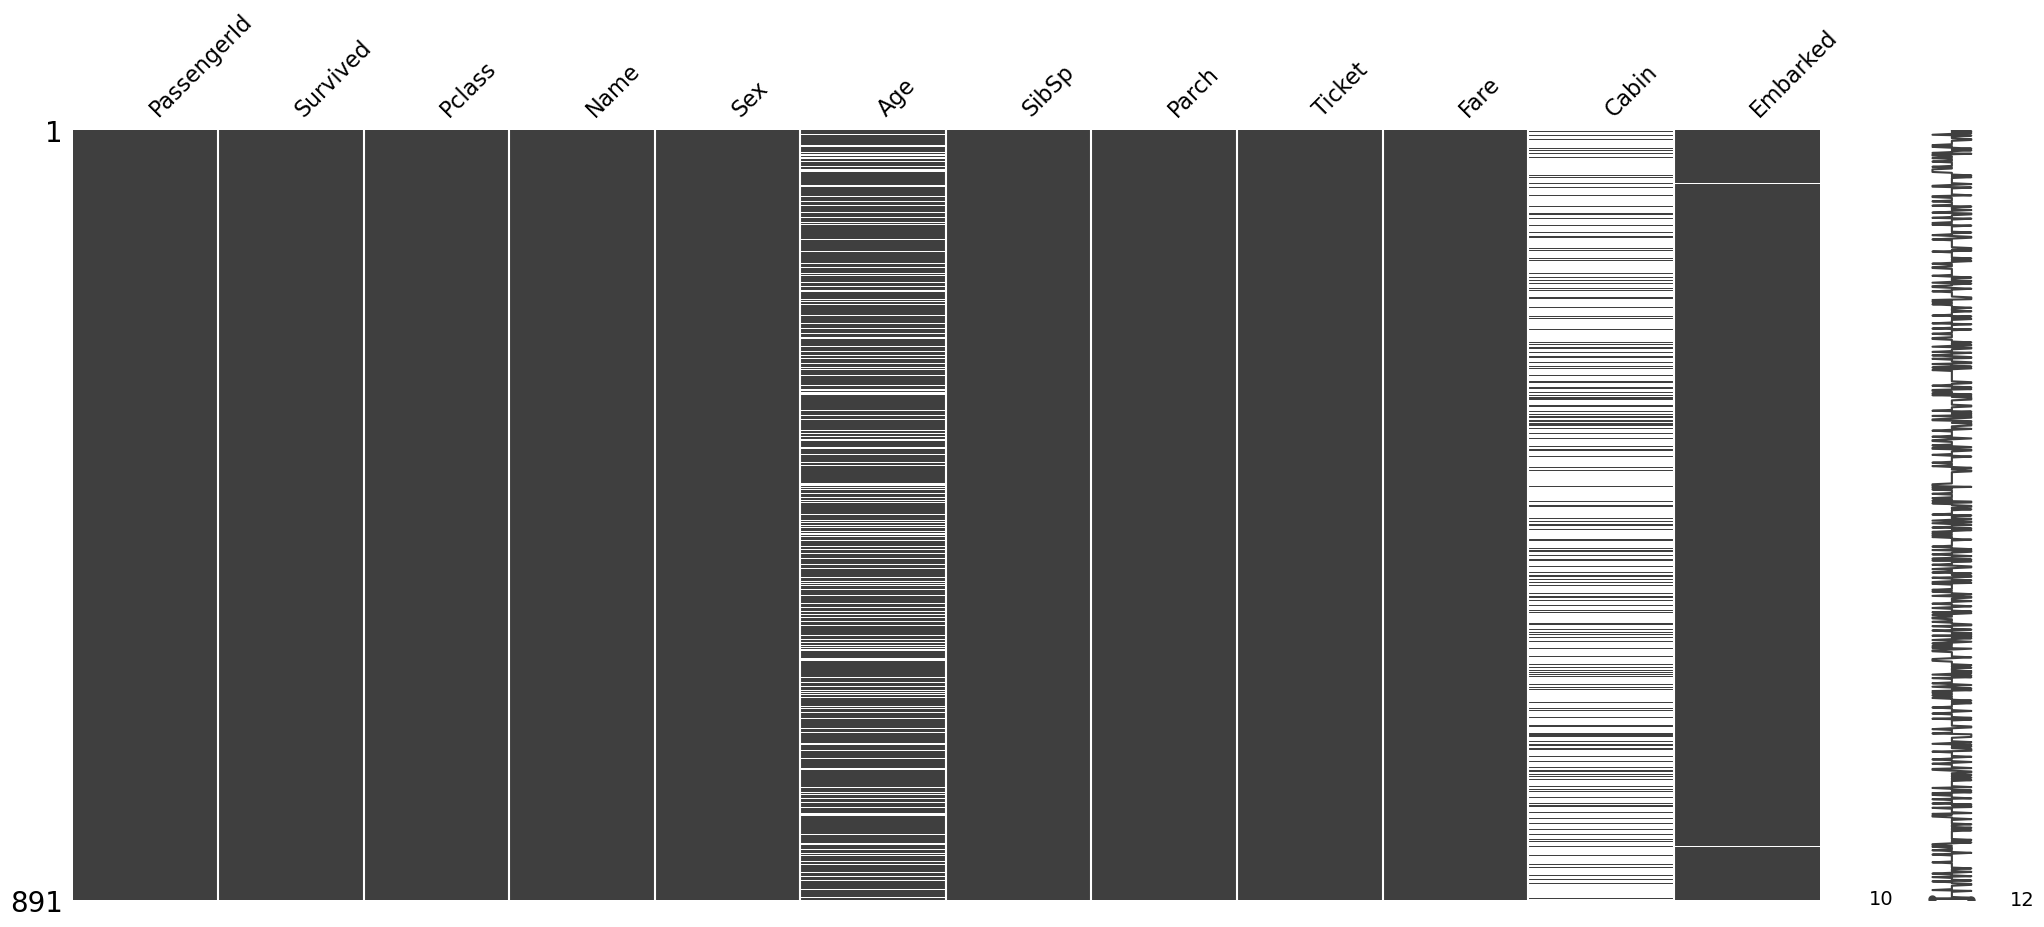

In [820]:
import missingno
missingno.matrix(train)

<AxesSubplot:>

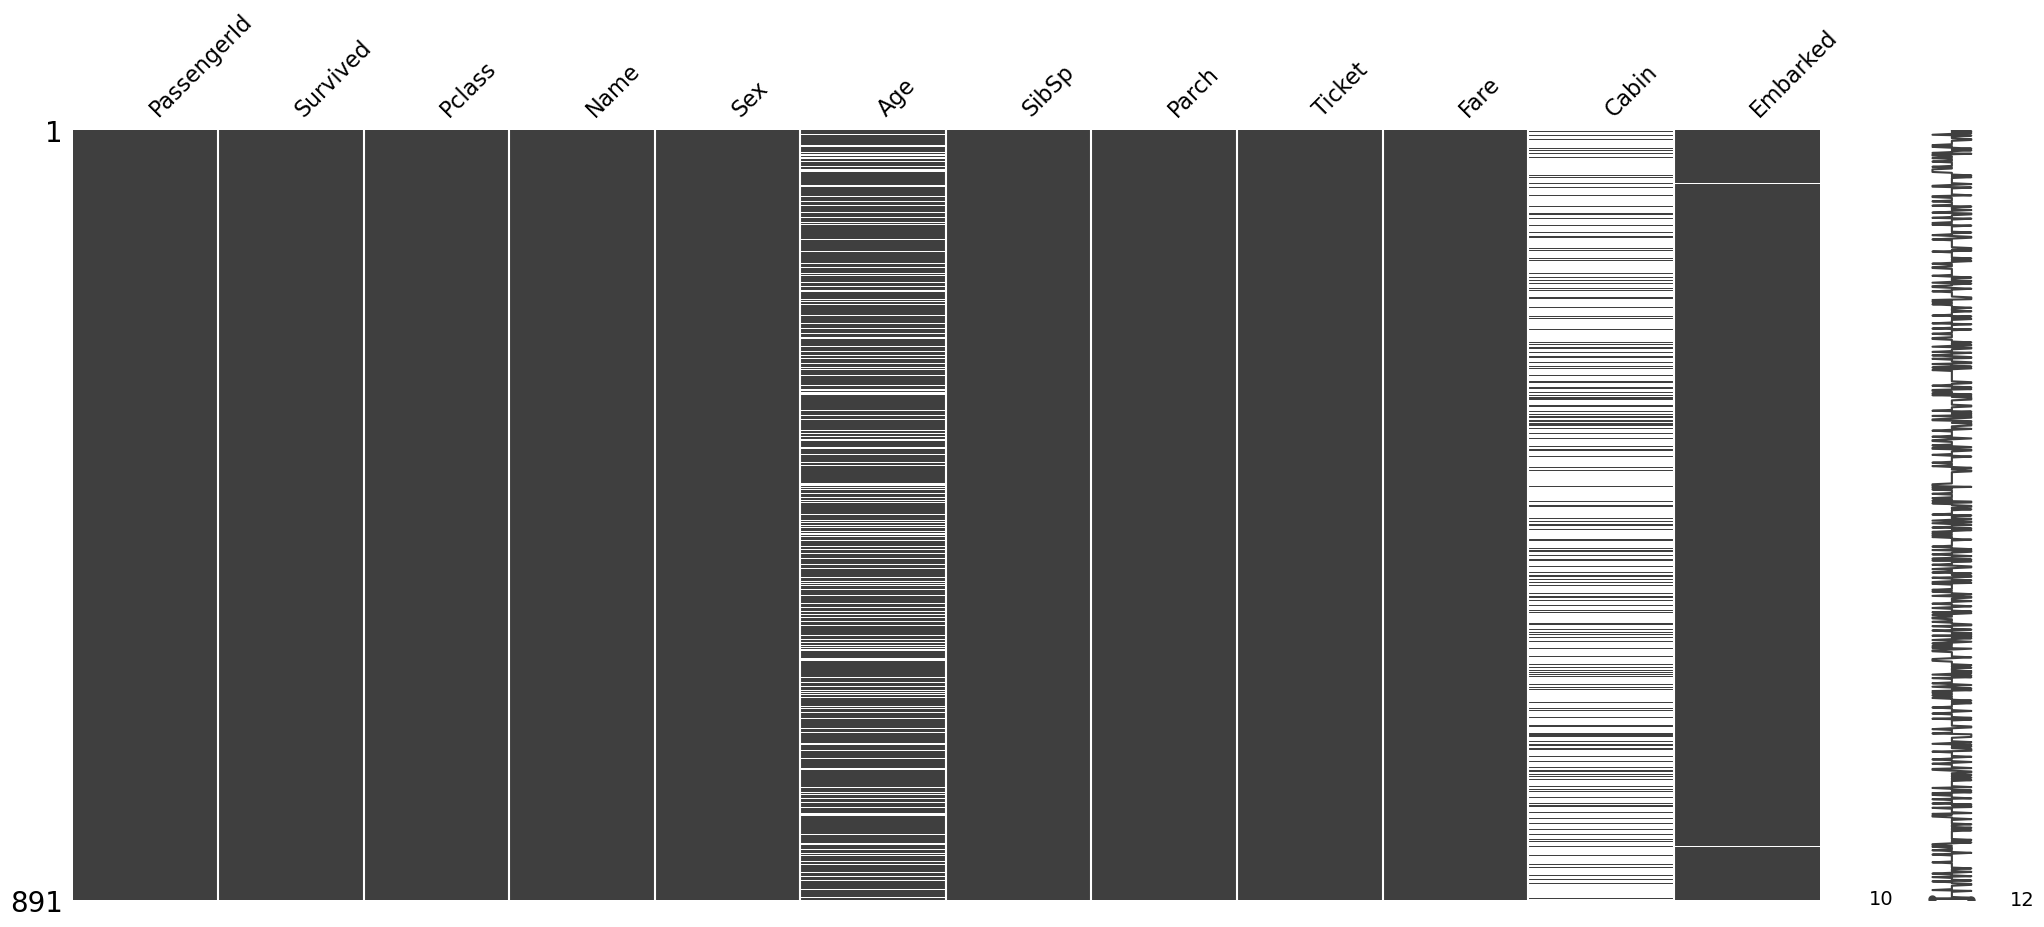

In [821]:
missingno.matrix(train)

In [822]:
train['Sex'].value_counts(dropna = False)


male      577
female    314
Name: Sex, dtype: int64

In [823]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

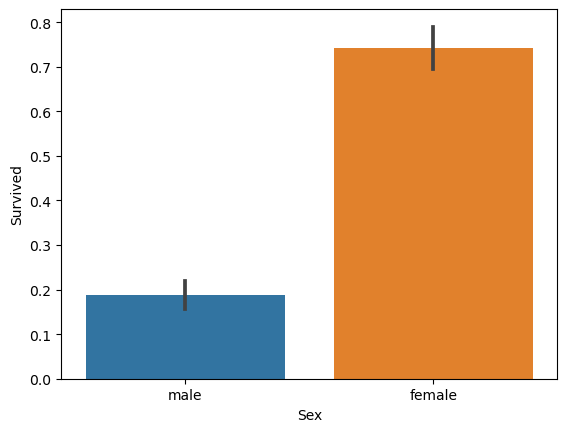

In [824]:
sns.barplot(x = 'Sex', y ='Survived', data = train)

In [825]:
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [826]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

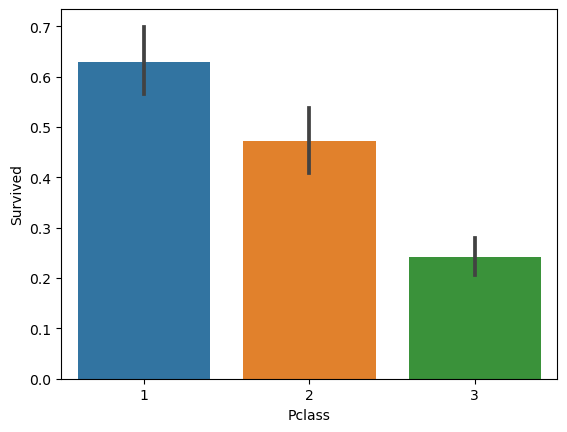

In [827]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

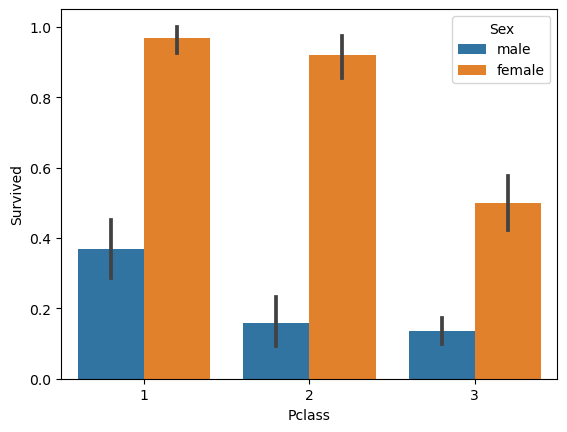

In [828]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train)


In [829]:
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [830]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

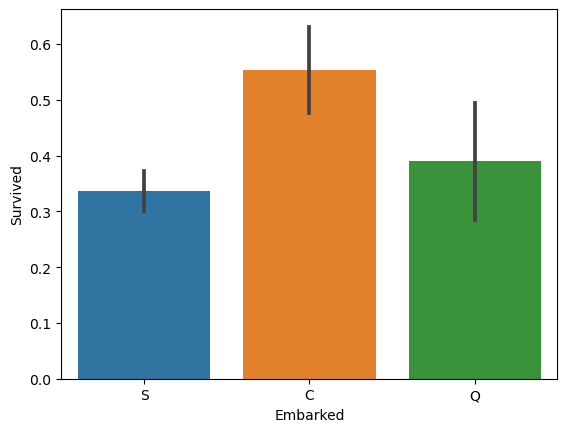

In [831]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

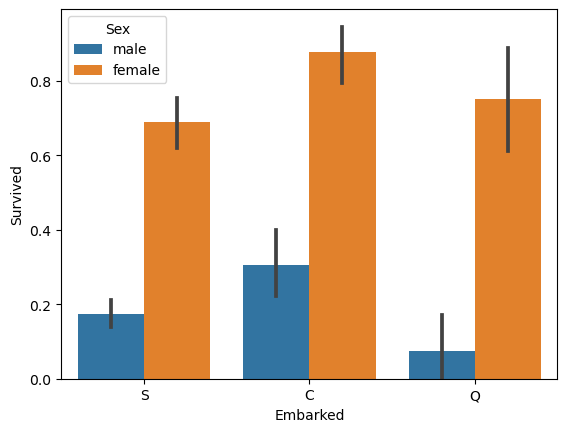

In [832]:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = train)

<AxesSubplot:>

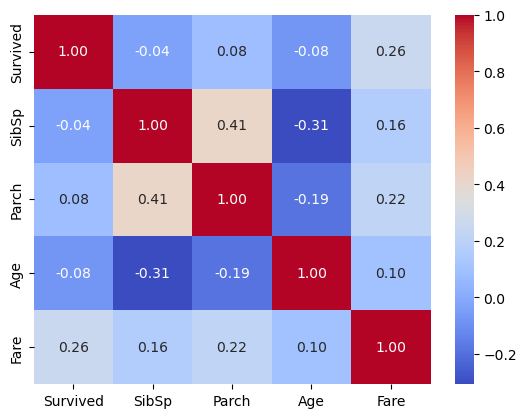

In [833]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


In [834]:
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [835]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

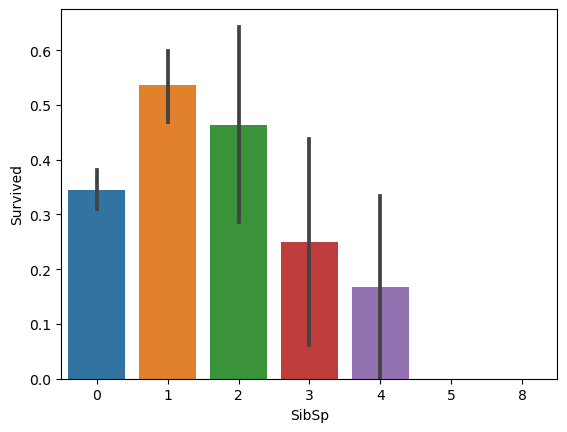

In [836]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)

In [837]:
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [838]:
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

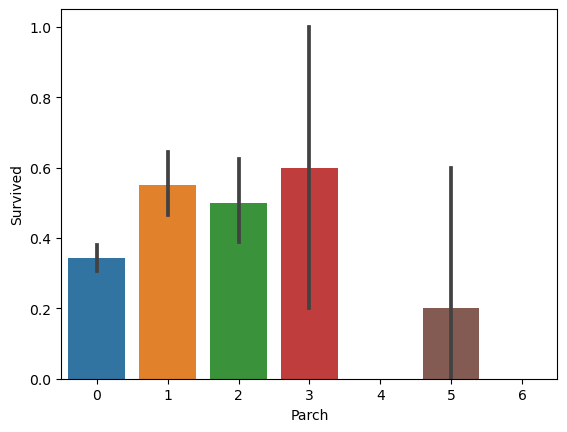

In [839]:
sns.barplot(x = 'Parch', y ='Survived', data = train)

In [840]:
train['Age'].isnull().sum()

177

<AxesSubplot:xlabel='Age', ylabel='Count'>

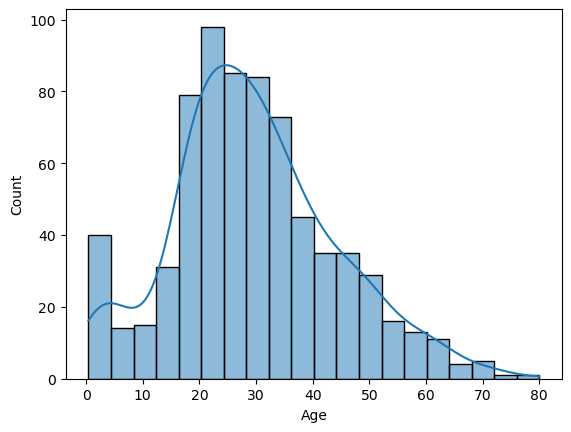

In [841]:
sns.histplot(data=train, x="Age", kde=True)

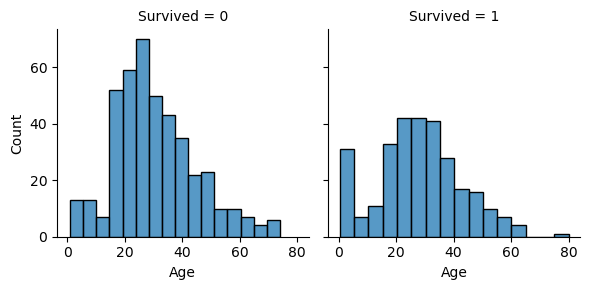

In [842]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.histplot, 'Age')

<AxesSubplot:xlabel='Age', ylabel='Density'>

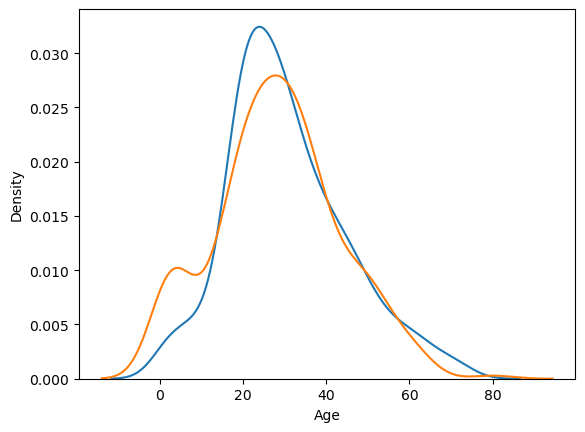

In [843]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')

In [844]:
train['Fare'].isnull().sum()

0

<AxesSubplot:xlabel='Fare', ylabel='Count'>

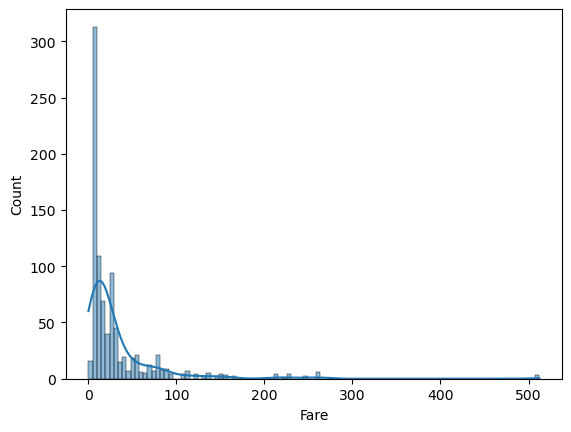

In [845]:
sns.histplot(data=train, x="Fare", kde=True)

In [846]:
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [847]:
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [848]:
combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            263
Embarked         2
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
dtype: int64

In [849]:
mode = combine['Embarked'].dropna().mode()[0]
mode


'S'

In [850]:
train['Embarked'].fillna(mode, inplace = True)
combine['Embarked'].fillna(mode, inplace = True)

In [851]:
combine.isnull().sum(0)

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         0
dtype: int64

In [852]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [853]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [854]:
combine['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

In [855]:
median = combine['Fare'].dropna().median()
median

14.4542

In [856]:
combine["Fare"].fillna(median,inplace = True)

In [857]:
test["Fare"].fillna(median,inplace = True)

In [858]:

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            263
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [859]:
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

<AxesSubplot:xlabel='Sex', ylabel='Age'>

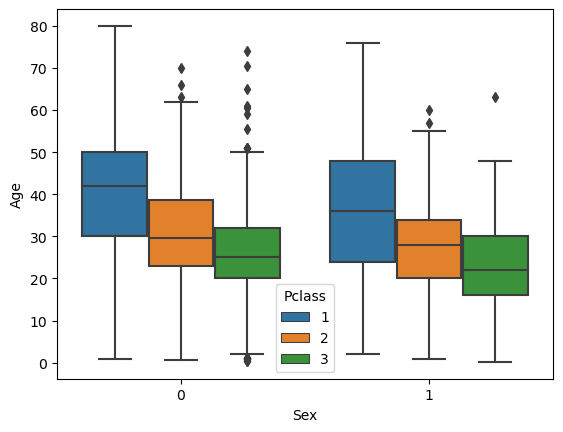

In [860]:
sns.boxplot(y = 'Age', x = 'Sex', hue = 'Pclass', data = combine)

<AxesSubplot:xlabel='Parch', ylabel='Age'>

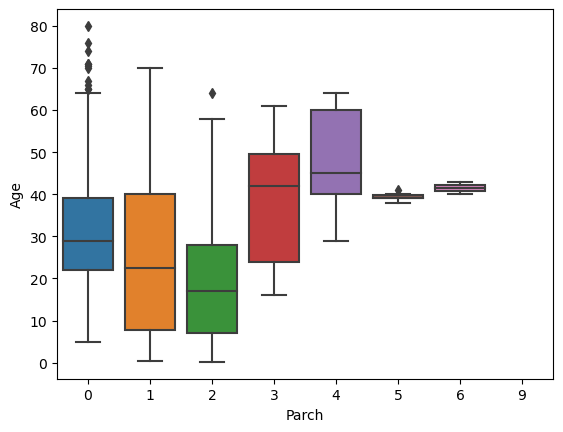

In [861]:
sns.boxplot(y = 'Age', x = 'Parch',  data = combine)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

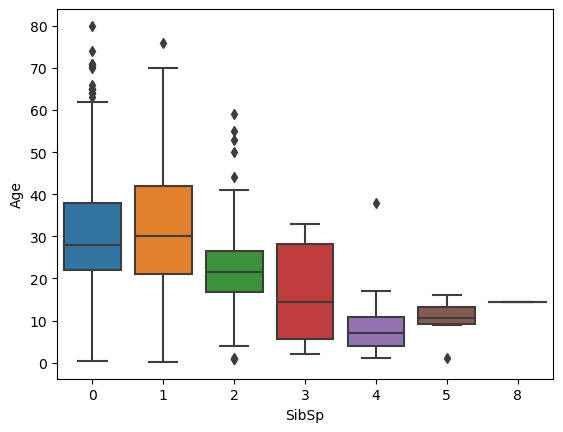

In [862]:
sns.boxplot(y = 'Age', x = 'SibSp',  data = combine)

<AxesSubplot:>

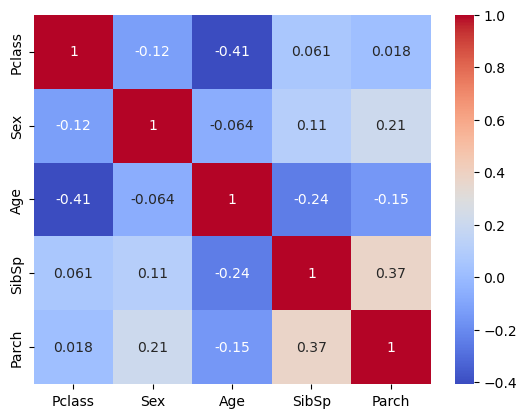

In [863]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')


In [864]:
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)


263

In [865]:
for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [866]:
combine['Age'].isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

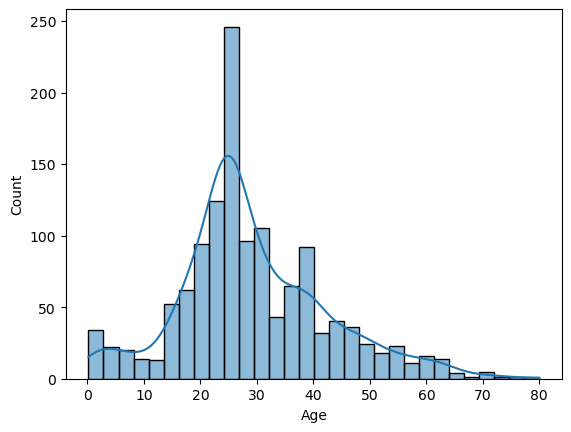

In [867]:
sns.histplot(data=combine, x="Age", kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

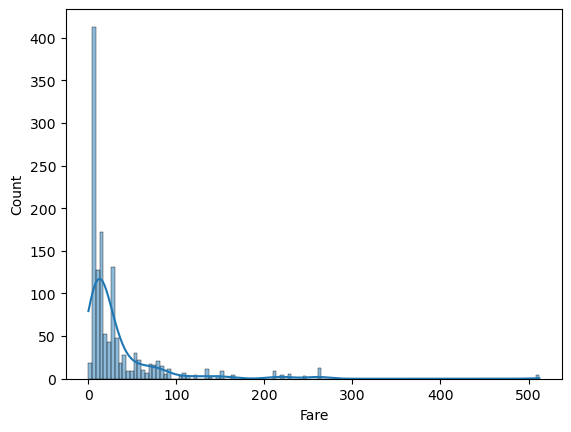

In [868]:
sns.histplot(data=combine, x="Fare", kde=True)

In [869]:

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

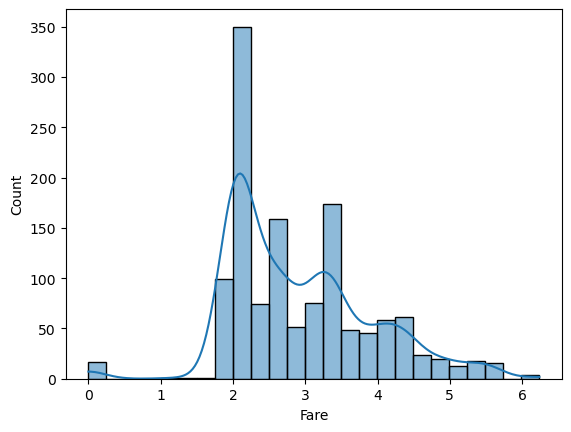

In [870]:
sns.histplot(data=combine, x="Fare", kde=True)

In [871]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [872]:
combine['Title'] = [name.split( ',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Title', 'Name']]

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
1304,Mr,"Spector, Mr. Woolf"
1305,Dona,"Oliva y Ocana, Dona. Fermina"
1306,Mr,"Saether, Mr. Simon Sivertsen"
1307,Mr,"Ware, Mr. Frederick"


In [873]:
combine['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [874]:
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess', 'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

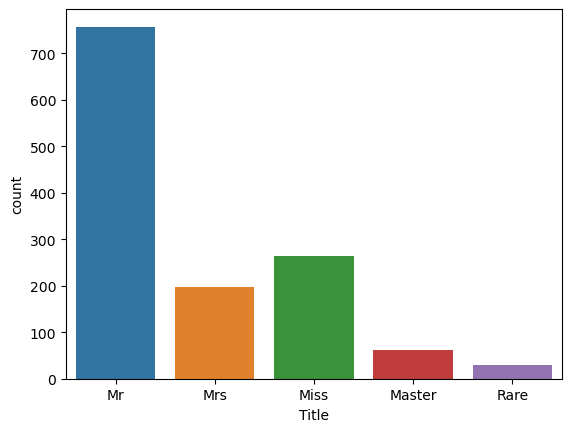

In [875]:
sns.countplot(data=combine, x= 'Title')

In [876]:
combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


<AxesSubplot:xlabel='Title', ylabel='Survived'>

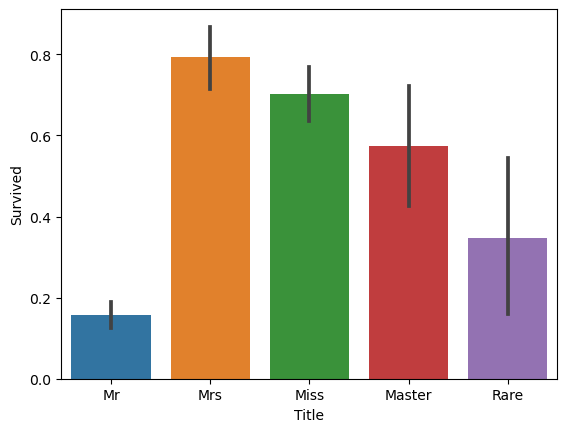

In [877]:
sns.barplot(data=combine, x='Title', y='Survived')

In [878]:
combine.drop('Name',axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,25.0,0,0,2.085672,S,Mr
1305,1306,NaN,1,1,39.0,0,0,4.690430,C,Rare
1306,1307,NaN,3,0,38.5,0,0,1.981001,S,Mr
1307,1308,NaN,3,0,25.0,0,0,2.085672,S,Mr


In [879]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S,Mr


In [880]:
combine['FamSize']= combine['Parch']+combine['SibSp']+1
combine[['FamSize','Parch','SibSp']]

,FamSize,Parch,SibSp
0,2,0,1
1,2,0,1
2,1,0,0
3,2,0,1
4,1,0,0
...,...,...,...
1304,1,0,0
1305,1,0,0
1306,1,0,0
1307,1,0,0


In [881]:
combine[['FamSize', 'Survived']].groupby(['FamSize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,FamSize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


<AxesSubplot:xlabel='FamSize', ylabel='Survived'>

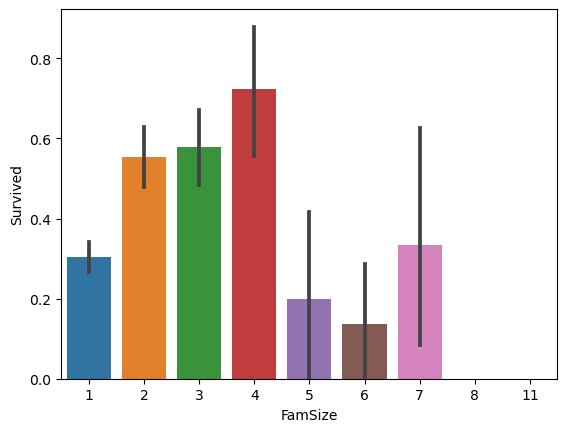

In [882]:
sns.barplot(data=combine, x='FamSize', y='Survived')

In [883]:
combine['Isalone']=0
combine.loc[combine['FamSize'] == 1, 'Isalone'] = 1

In [884]:
combine[['Isalone', 'Survived']].groupby(['Isalone'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Isalone,Survived
0,0,0.505650
1,1,0.303538


<AxesSubplot:xlabel='Isalone', ylabel='Survived'>

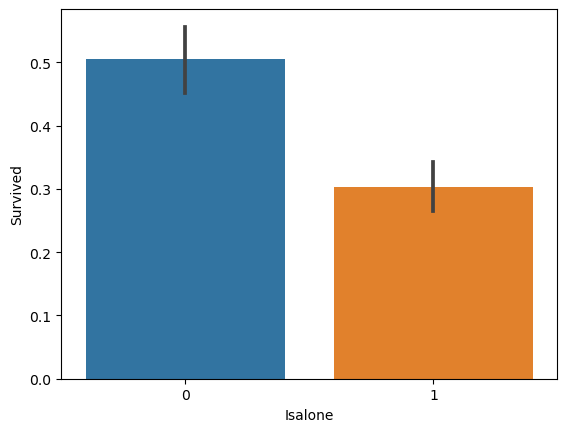

In [885]:
sns.barplot(data=combine, x= 'Isalone', y='Survived')

In [886]:
combine= combine.drop(['SibSp','Parch','FamSize'],axis =1)

In [887]:
combine['Band']=pd.cut(combine['Age'],5)
combine['Band']

0       (16.136, 32.102]
1       (32.102, 48.068]
2       (16.136, 32.102]
3       (32.102, 48.068]
4       (32.102, 48.068]
              ...       
1304    (16.136, 32.102]
1305    (32.102, 48.068]
1306    (32.102, 48.068]
1307    (16.136, 32.102]
1308    (0.0902, 16.136]
Name: Band, Length: 1309, dtype: category
Categories (5, interval[float64, right]): [(0.0902, 16.136] < (16.136, 32.102] < (32.102, 48.068] < (48.068, 64.034] < (64.034, 80.0]]

In [888]:
combine[['Band','Survived']].groupby(['Band'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,Band,Survived
0,"(0.0902, 16.136]",0.500000
3,"(48.068, 64.034]",0.434783
2,"(32.102, 48.068]",0.412844
1,"(16.136, 32.102]",0.341719
4,"(64.034, 80.0]",0.090909


In [889]:
combine.loc[combine['Age']<=16 , 'Age']=0
combine.loc[(combine['Age']>16) & (combine['Age']<=32), 'Age']=1
combine.loc[(combine['Age']>32) & (combine['Age']<=48), 'Age']=2
combine.loc[(combine['Age']>48) & (combine['Age']<=64), 'Age']=3
combine.loc[(combine['Age']>64) & (combine['Age']<=80), 'Age']=4


In [890]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Isalone,Band
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1.0,1.981001,S,Mr,0,"(16.136, 32.102]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,4.266662,C,Mrs,0,"(32.102, 48.068]"
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1.0,2.070022,S,Miss,1,"(16.136, 32.102]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,3.972177,S,Mrs,0,"(32.102, 48.068]"
4,5,0.0,3,"Allen, Mr. William Henry",0,2.0,2.085672,S,Mr,1,"(32.102, 48.068]"


In [891]:
combine= combine.drop(['Band','Name'],axis=1)

In [892]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,1,0.0,3,0,1.0,1.981001,S,Mr,0
1,2,1.0,1,1,2.0,4.266662,C,Mrs,0
2,3,1.0,3,1,1.0,2.070022,S,Miss,1
3,4,1.0,1,1,2.0,3.972177,S,Mrs,0
4,5,0.0,3,0,2.0,2.085672,S,Mr,1


In [893]:
combine['Age'] = combine['Age'].astype('int')

In [894]:
combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


<AxesSubplot:>

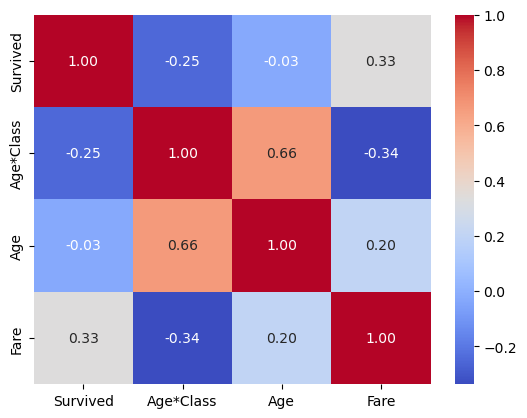

In [895]:
sns.heatmap(combine[['Survived', 'Embarked','Age*Class', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


In [896]:
combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [897]:
combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.504983
3,"(4.679, 6.239]",0.745098


In [898]:


combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [899]:
combine['Fare'] = combine['Fare'].astype('int')

In [900]:
combine = combine.drop('FareBand', axis = 1)

In [901]:
train = combine[:len(train)]

In [902]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [903]:
test = combine[len(train):]

In [904]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
892,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
893,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
894,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
895,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [905]:
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [906]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [907]:
xtest = test.drop('Survived', axis = 1)
xtest.head()

,PassengerId,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
892,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
893,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
894,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
895,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


Modelling

In [908]:
xtrain = train.drop('Survived',axis=1)
xtrain

,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,3,0,2,1,1,6,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,1,1,1,2,0,0,0,0,1,0,0,1
887,1,1,1,2,1,1,0,1,0,0,0,0,0,1
888,3,1,0,2,0,0,0,1,0,0,0,0,0,1
889,1,0,1,2,1,1,0,0,1,0,0,1,0,0


In [909]:
ytrain=train[['Survived']]
ytrain

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [910]:
result= pd.DataFrame()
result['PassengerId']=xtest['PassengerId']


In [911]:
xtest=xtest.drop('PassengerId',axis=1)

In [912]:
xtrain.head()

,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [913]:
# parameters ={'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}

In [914]:
logreg = LogisticRegression()  
#logreg_cv = GridSearchCV(logreg, param_grid = parameters, scoring='accuracy', cv=4)
#logreg_cv.fit(xtrain,ytrain)
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [915]:
#logreg_cv.best_params_

In [916]:
#ypred=logreg_cv.predict(xtest)
ypred=logreg.predict(xtest)
ypred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [917]:
#logreg_cv.best_score_*100

In [918]:
logreg_acc = round(logreg.score(xtrain,ytrain)*100,2)
(logreg_acc)

82.38

In [919]:
svc= SVC()
svc.fit(xtrain,ytrain)

SVC()

In [920]:
svc_acc= round(svc.score(xtrain,ytrain)*100,2)
svc_acc

82.83

In [921]:
#parameters = {'criterion': ['gini', 'entropy'],
 #    'splitter': ['best', 'random'],
  #   'max_depth': [2*n for n in range(1,10)],
   #  'max_features': ['auto', 'sqrt'],
    # 'min_samples_leaf': [1, 2, 4],
    # 'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [922]:
#tree_cv= GridSearchCV(tree,param_grid = parameters, scoring='accuracy', cv=4)

In [923]:
#tree_cv.fit(xtrain,ytrain)
tree.fit(xtrain,ytrain)
tree_acc = round(tree.score(xtrain,ytrain)*100,2)
tree_acc

85.86

In [924]:
#tree_cv.best_params_

In [925]:
#round(tree_cv.best_score_*100,2)

In [926]:
ypred =tree_cv.predict(xtest)

In [927]:
#tree_acc = round(tree_cv.score(xtrain,ytrain)*100,2)
#tree_acc

In [928]:
#parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 #             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  #            'p': [1,2]}

KNN = KNeighborsClassifier()

In [929]:
#knn_cv = GridSearchCV(KNN,param_grid = parameters, scoring='accuracy', cv=4)

In [930]:
#knn_cv.fit(xtrain,ytrain)

In [931]:
#knn_cv.best_params_

In [932]:
#knn_cv.best_score_*100

In [933]:
#knn_acc = round(knn_cv.score(xtrain,ytrain)*100,2)
#knn_acc

In [934]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [935]:
knn_acc = round(KNN.score(xtrain,ytrain)*100,2)
knn_acc

85.07

In [936]:
ypred = KNN.predict(xtest)

In [937]:
gaussian = GaussianNB()
gaussian.fit(xtrain,ytrain)
ypred = gaussian.predict(xtest)
gaussian_acc= round(gaussian.score(xtrain,ytrain)*100,2)
gaussian_acc

78.9

In [938]:
perceptron = Perceptron()
perceptron.fit(xtrain, ytrain)
ypred = perceptron.predict(xtest)
perceptron_acc = round(perceptron.score(xtrain, ytrain) * 100, 2)
perceptron_acc

76.88

In [939]:
linear_svc = LinearSVC()
linear_svc.fit(xtrain, ytrain)
ypred = linear_svc.predict(xtest)
linear_svc_acc = round(linear_svc.score(xtrain, ytrain) * 100, 2)
linear_svc_acc

82.04

In [940]:
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
Y_pred = sgd.predict(xtest)
sgd_acc = round(sgd.score(xtrain, ytrain) * 100, 2)
sgd_acc

80.25

In [941]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(xtrain, ytrain)
ypred = random_forest.predict(xtest)
random_forest_acc = round(random_forest.score(xtrain, ytrain) * 100, 2)
random_forest_acc

85.86

In [942]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [svc_acc, knn_acc, logreg_acc, random_forest_acc, gaussian_acc, perceptron_acc,
                                 sgd_acc, linear_svc_acc, tree_acc]})


In [943]:
models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.86
1,Decision Tree,85.86
2,KNN,85.07
3,Support Vector Machines,82.83
4,Logistic Regression,82.38
5,Linear SVC,82.04
6,Stochastic Gradient Decent,80.25
7,Naive Bayes,78.90
8,Perceptron,76.88


In [944]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())

len(classifiers)

9

In [945]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, xtrain, ytrain, scoring = 'accuracy', cv = 4))

In [946]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [947]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.826051,0.021256,Support Vector Machines
1,0.820451,0.026947,Random Forest
2,0.818204,0.015785,KNN
3,0.811477,0.022653,Logistic Regression
4,0.804746,0.024029,Linear SVC
5,0.796878,0.019184,Decision Tree
6,0.786778,0.035259,Stochastic Gradient Descent
7,0.782284,0.022823,Gausian Naive Bayes
8,0.662329,0.142275,Perceptron


<AxesSubplot:xlabel='Cross Validation Mean', ylabel='Algorithm'>

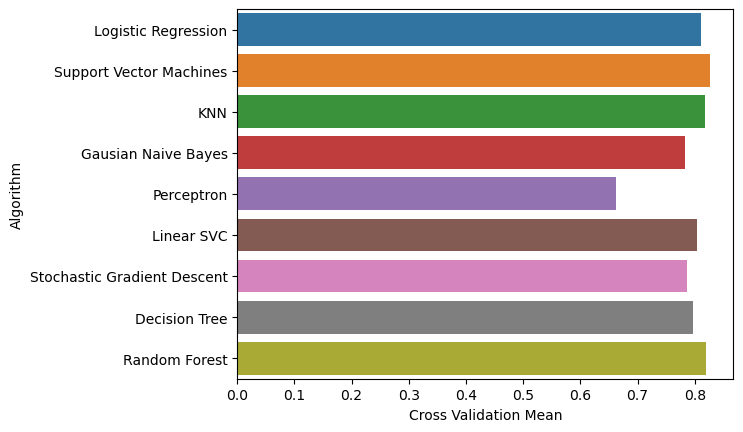

In [948]:
sns.barplot(x= 'Cross Validation Mean', y= 'Algorithm', data = cv_res)

In [949]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(xtrain, ytrain)
svc_acc = round(svc.score(xtrain,ytrain)*100,2)
svc_acc


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.764 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.753 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

82.83

In [950]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [951]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [952]:
svc = SVC(C=100, gamma= 0.01, kernel= 'rbf')
svc.fit(xtrain,ytrain)
ypred= svc.predict(xtest)
svc_acc = round(svc.score(xtrain,ytrain)*100,2)
svc_acc

83.73

In [953]:
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [954]:
len(ypred)

418

In [955]:
xtest

,Pclass,Sex,Age,Fare,Isalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,3,0,2,1,1,6,0,0,1,0,0,0,1,0
892,3,1,2,1,0,6,0,0,0,1,0,0,0,1
893,2,0,3,1,1,6,0,0,1,0,0,0,1,0
894,3,0,1,1,1,3,0,0,1,0,0,0,0,1
895,3,1,1,1,0,3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,1,1,3,0,0,1,0,0,0,0,1
1305,1,1,2,3,1,2,0,0,0,0,1,1,0,0
1306,3,0,2,1,1,6,0,0,1,0,0,0,0,1
1307,3,0,1,1,1,3,0,0,1,0,0,0,0,1


In [956]:
result

,PassengerId
891,892
892,893
893,894
894,895
895,896
...,...
1304,1305
1305,1306
1306,1307
1307,1308


In [957]:
result['Survived']=ypred

In [958]:
result

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [959]:
result.shape

(418, 2)

In [960]:
sample = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [961]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [962]:
result.reset_index(inplace = True,drop=True)

In [963]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [964]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [965]:
result.to_csv("/kaggle/working/result.csv", index = False)